In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import glob
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
from cycler import cycler
%matplotlib inline

from scipy import stats

In [2]:
t_titre = 35/2 #35
t_label = 25/2 #25
fig_width = 15/2 #15
colors = ['black','dimgrey','grey','darkgrey','silver','rosybrown','lightcoral','indianred','firebrick','brown','darkred','red']

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    #print(a)

In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
param = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK'] :
        a = 'parametre/param_Fit_%s.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            param.append(b)

In [6]:
print((param[0]['moyenne'][0][10]))

-0.013691850292


In [7]:
print (param[0].keys())

dict_keys(['maxi', 'tau', 'start_anti', 'observer', 'latence', 'moyenne', 'v_anti'])


### - les premier essais après le switch

In [8]:
# liste de tout
full_proba = [[],[]]
full_bino = [[],[]]
full_results = [[],[]]
full_va = [[],[]]
full_mean = [[],[]]

# listes de tout par sujet
proba_sujet = [[],[]]
bino_sujet = [[],[]]
results_sujet = [[],[]]
va_sujet = [[],[]]
mean_sujet = [[],[]]

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    v_anti = param[x]['v_anti']
    mean = param[x]['moyenne']
    
    liste_proba = [[],[]]
    liste_bino = [[],[]]
    liste_results = [[],[]]
    liste_va = [[],[]]
    liste_mean = [[],[]]
    
    badabada = [0, 3]
    
    for block in range(N_blocks):
        
        switch = []
        for s in range(N_trials):
            if s in [0,50,100,150] :
                switch.append(s)
            if p[s, block, 2]==1 :
                switch.append(s)
        switch.append(N_trials)
        
        for s1 in range(len(switch)-1) :
            
            for a in range(len(badabada)) :

                for trial in np.arange(switch[s1]+5*a, switch[s1+1]) :
                    full_proba[a].append(p[trial, block, 1])
                    full_bino[a].append(p[trial, block, 0])
                    full_results[a].append(results[trial, block])
                    full_va[a].append(v_anti[block][trial])
                    full_mean[a].append(mean[block][trial]) 

                    liste_proba[a].append(p[trial, block, 1])
                    liste_bino[a].append(p[trial, block, 0])
                    liste_results[a].append(results[trial, block])
                    liste_va[a].append(v_anti[block][trial])
                    liste_mean[a].append(mean[block][trial])
                
                
    for b in range(len(liste_proba)) :                      
        proba_sujet[b].append(liste_proba[b])
        bino_sujet[b].append(liste_bino[b])
        results_sujet[b].append(liste_results[b])
        va_sujet[b].append(liste_va[b])
        mean_sujet[b].append(liste_mean[b])

In [9]:
print(switch)

[0, 17, 38, 50, 100, 150, 155, 190, 200]


In [10]:
nb_sujet = len(proba_sujet[0])
nb_suppression = len(proba_sujet)
liste_suppression = ['', '- 15']

In [11]:
def plot_sujet(proba, para,
               titre, y_1, y_2, x_label, y_label,
               liste_suppression=liste_suppression,
               nb_sujet=nb_sujet, colors=colors) :

    fig, axs = plt.subplots(nb_suppression, nb_sujet, figsize=(fig_width*nb_sujet, (fig_width*nb_suppression)/1.6180))

    plt.subplots_adjust(hspace=0.4)
    fig.suptitle(titre, fontsize=t_titre*2)

    for x, color in enumerate(colors[:nb_sujet]):

        for a, nom in enumerate(liste_suppression) :

            pro = proba[a][x]
            par = para[a][x]
            axs[a][x].scatter(pro, par, c=color, alpha=0.5, linewidths=0)



            pro = np.ma.masked_array(pro, mask=np.isnan(par)).compressed()
            par = np.ma.masked_array(par, mask=np.isnan(par)).compressed()
            slope, intercept, r_value, p_value, std_err = stats.linregress(pro, par)
            x_test = np.linspace(np.min(pro), np.max(pro), 100)


            fitLine = slope * x_test + intercept

            axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
            axs[a][x].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)

            axs[a][x].axis([-0.032, 1.032, y_1, y_2])
            axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
            axs[a][x].set_xlabel(x_label, fontsize=t_label)
            axs[a][x].set_ylabel(y_label, fontsize=t_label)

## Probabilité réel

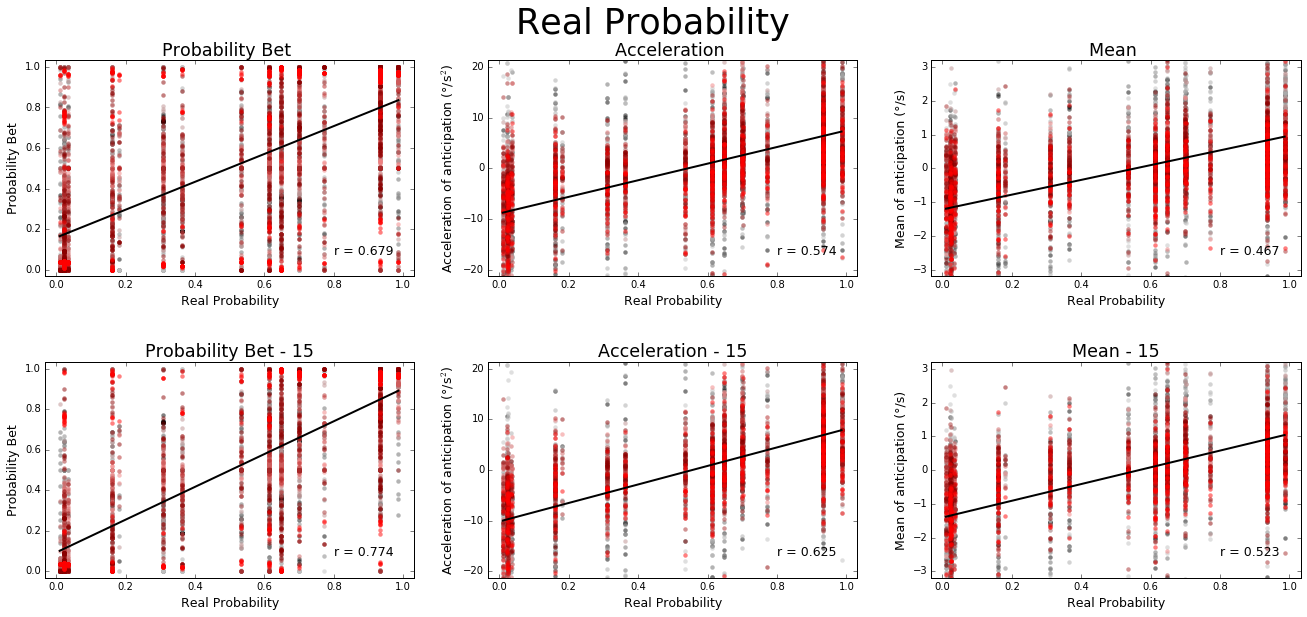

In [12]:
fig, axs = plt.subplots(nb_suppression, 3, figsize=(fig_width*3, (fig_width*nb_suppression)/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability", fontsize=t_titre*2)

for z, comparaison in enumerate(['Probability Bet', 'Acceleration', 'Mean']) :

    for a, nom in enumerate(liste_suppression) :
        
        proba = full_proba[a]
        proba_s = proba_sujet[a]
        
        if z == 0 :
            axs[a][z].set_ylabel('Probability Bet', fontsize=t_label)
            sujet = results_sujet[a]
            full = full_results[a]
            y_1 = -0.032
            y_2 = 1.032
        
        elif z == 1 :
            axs[a][z].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
            sujet = va_sujet[a]
            full = full_va[a]
            y_1 = -21.28
            y_2 = 21.28
        
        elif z == 2 :
            axs[a][z].set_ylabel('Mean of anticipation (°/s)', fontsize=t_label)
            sujet = mean_sujet[a]
            full = full_mean[a]
            y_1 = -3.192
            y_2 = 3.192

        

        for x, color in enumerate(colors[:len(proba_sujet[0])]):
            axs[a][z].scatter(proba_s[x], sujet[x], c=color, alpha=0.5, linewidths=0)
        

        # masque les NAN
        proba = np.ma.masked_array(proba, mask=np.isnan(full)).compressed()
        full = np.ma.masked_array(full, mask=np.isnan(full)).compressed()        

        slope, intercept, r_value, p_value, std_err = stats.linregress(proba, full)
        x_test = np.linspace(np.min(proba), np.max(proba), 100)
        fitLine = slope * x_test + intercept
        axs[a][z].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][z].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)

        axs[a][z].axis([-0.032, 1.032, y_1, y_2])
 
        axs[a][z].set_title("%s %s"%(comparaison, nom), fontsize=t_titre)
        axs[a][z].set_xlabel('Real Probability', fontsize=t_label)

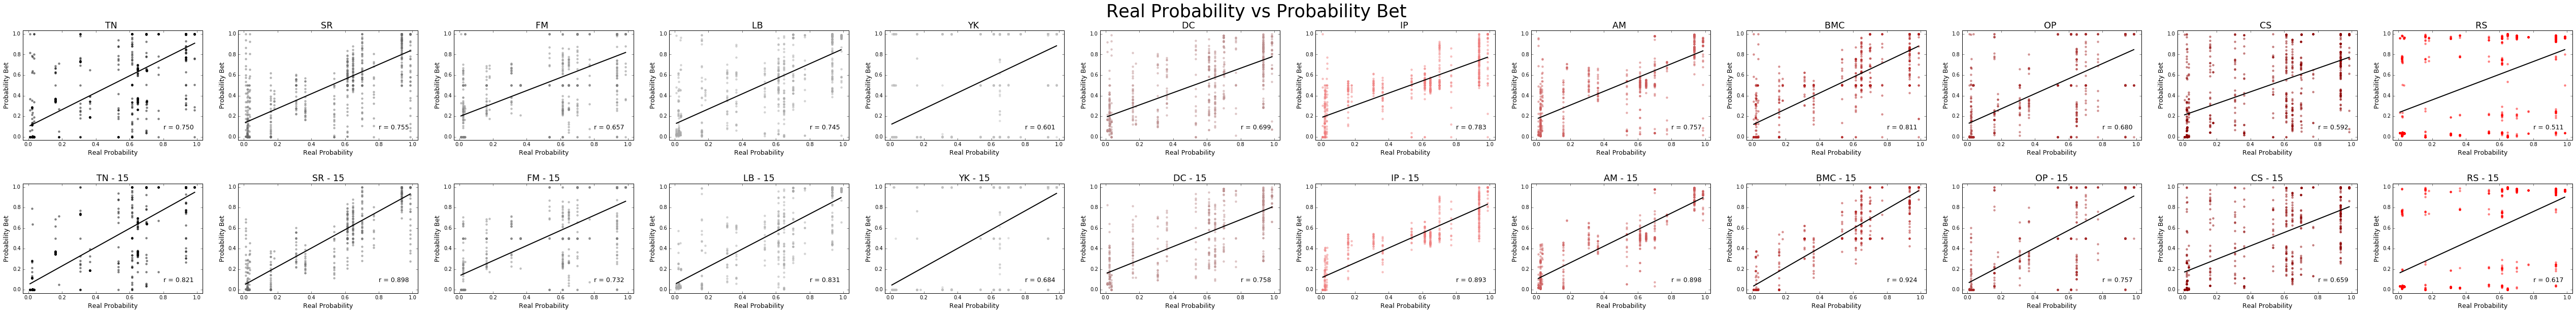

In [13]:
titre = "Real Probability vs Probability Bet"
y_1 = -0.032
y_2 = 1.032
proba = proba_sujet
para = results_sujet
x_label = 'Real Probability'
y_label = 'Probability Bet'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

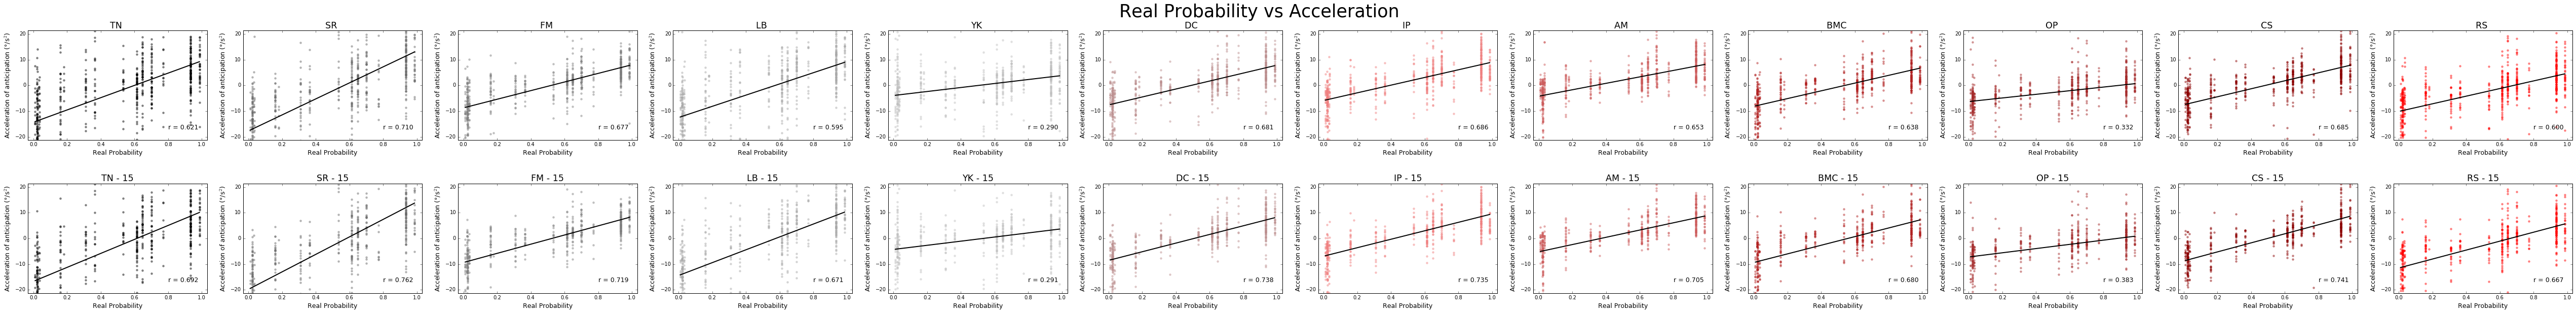

In [14]:
titre = "Real Probability vs Acceleration"
y_1 = -21.28
y_2 = 21.28
proba = proba_sujet
para = va_sujet
x_label = 'Real Probability'
y_label = 'Acceleration of anticipation (°/s$^2$)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

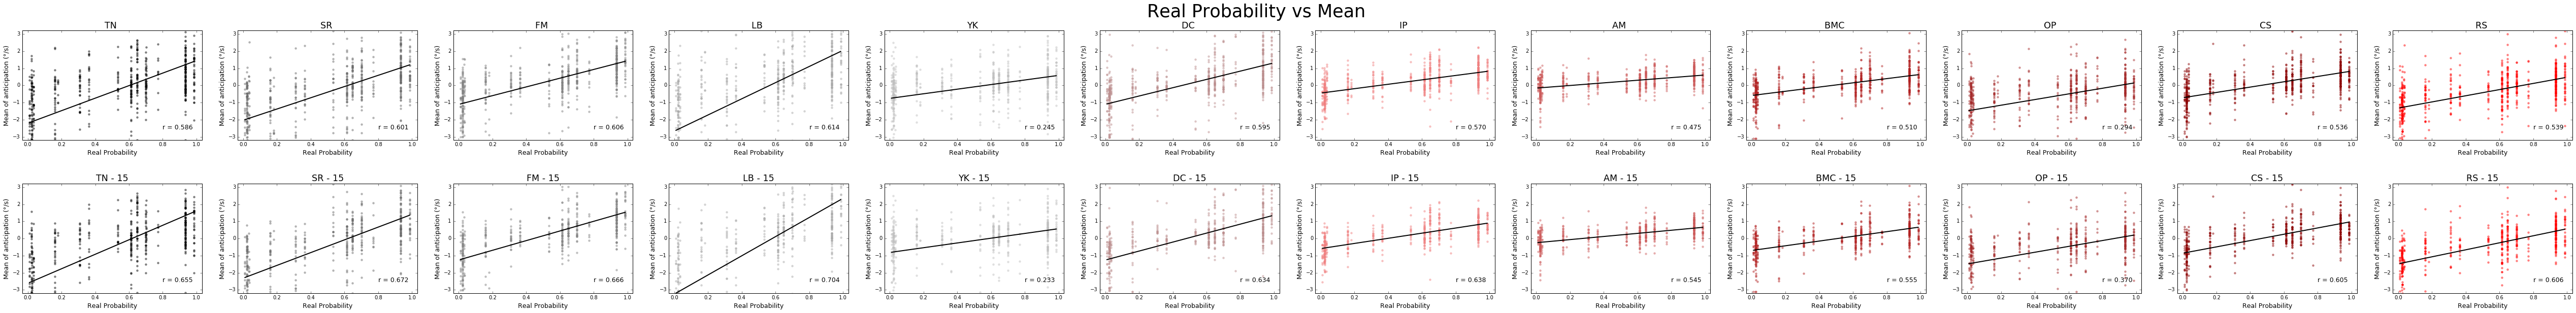

In [15]:
titre = "Real Probability vs Mean"
y_1 = -3.192
y_2 = 3.192
proba = proba_sujet
para = mean_sujet
x_label = 'Real Probability'
y_label = 'Mean of anticipation (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

## Probabilité parié

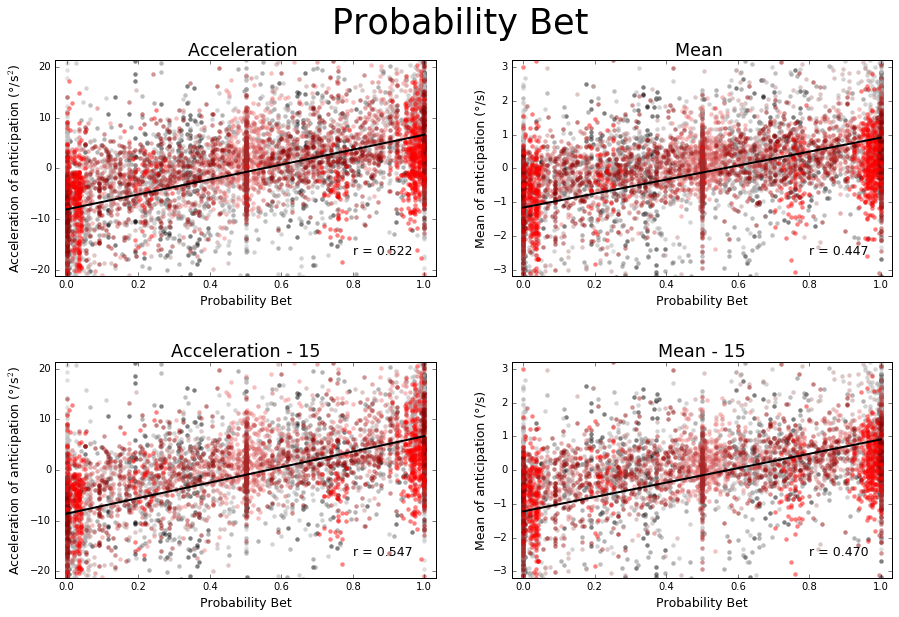

In [16]:
fig, axs = plt.subplots(nb_suppression, 2, figsize=(fig_width*2, (fig_width*nb_suppression)/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet", fontsize=t_titre*2)

for z, comparaison in enumerate(['Acceleration', 'Mean']):

    for a, nom in enumerate(liste_suppression) :
        
        proba = full_results[a]
        proba_s = results_sujet[a]
        if z == 0 :
            axs[a][z].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
            sujet = va_sujet[a]
            full = full_va[a]
            y_1 = -21.28
            y_2 = 21.28
        
        elif z == 1 :
            axs[a][z].set_ylabel('Mean of anticipation (°/s)', fontsize=t_label)
            sujet = mean_sujet[a]
            full = full_mean[a]
            y_1 = -3.192
            y_2 = 3.192
        

        for x, color in enumerate(colors[:nb_sujet]):
            axs[a][z].scatter(proba_s[x], sujet[x], c=color, alpha=0.5, linewidths=0)
        
        # masque les NAN
        proba = np.ma.masked_array(proba, mask=np.isnan(full)).compressed()
        full = np.ma.masked_array(full, mask=np.isnan(full)).compressed()
        slope, intercept, r_value, p_value, std_err = stats.linregress(proba, full)
        x_test = np.linspace(np.min(proba), np.max(proba), 100)
        fitLine = slope * x_test + intercept

        axs[a][z].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][z].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][z].axis([-0.032, 1.032, y_1, y_2])
 
        axs[a][z].set_title("%s %s"%(comparaison, nom), fontsize=t_titre)
        axs[a][z].set_xlabel('Probability Bet', fontsize=t_label)

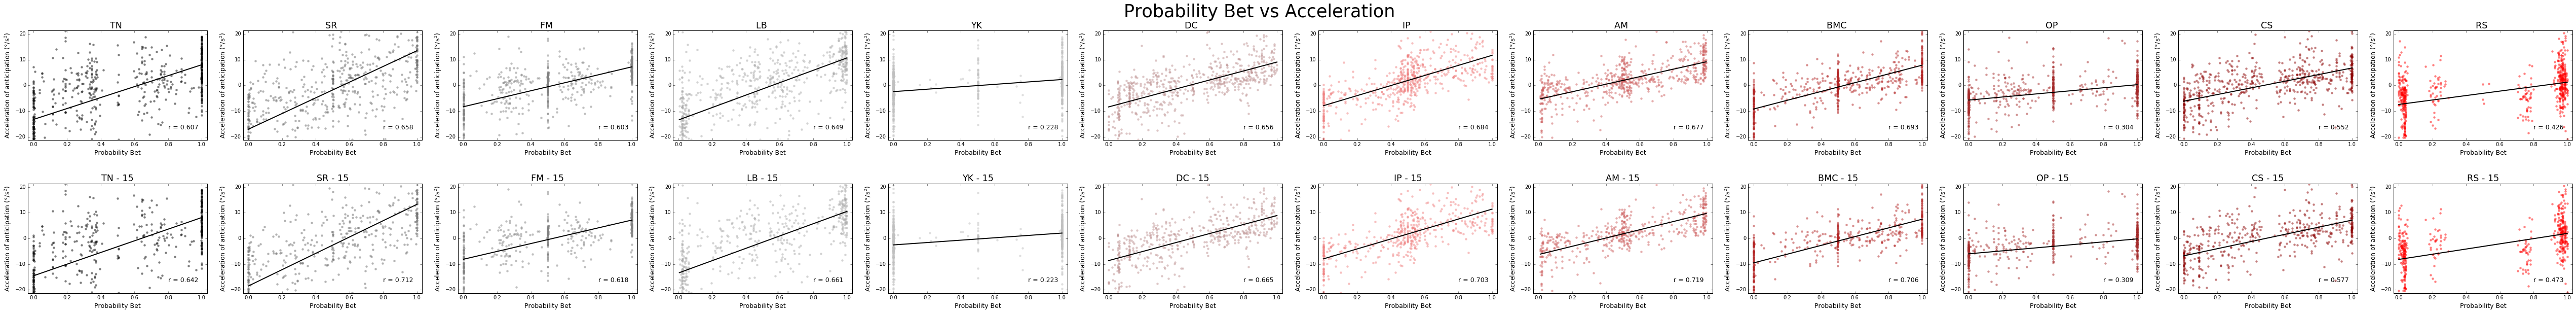

In [17]:
titre = "Probability Bet vs Acceleration"
y_1 = -21.28
y_2 = 21.28
proba = results_sujet
para = va_sujet
x_label = 'Probability Bet'
y_label = 'Acceleration of anticipation (°/s$^2$)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

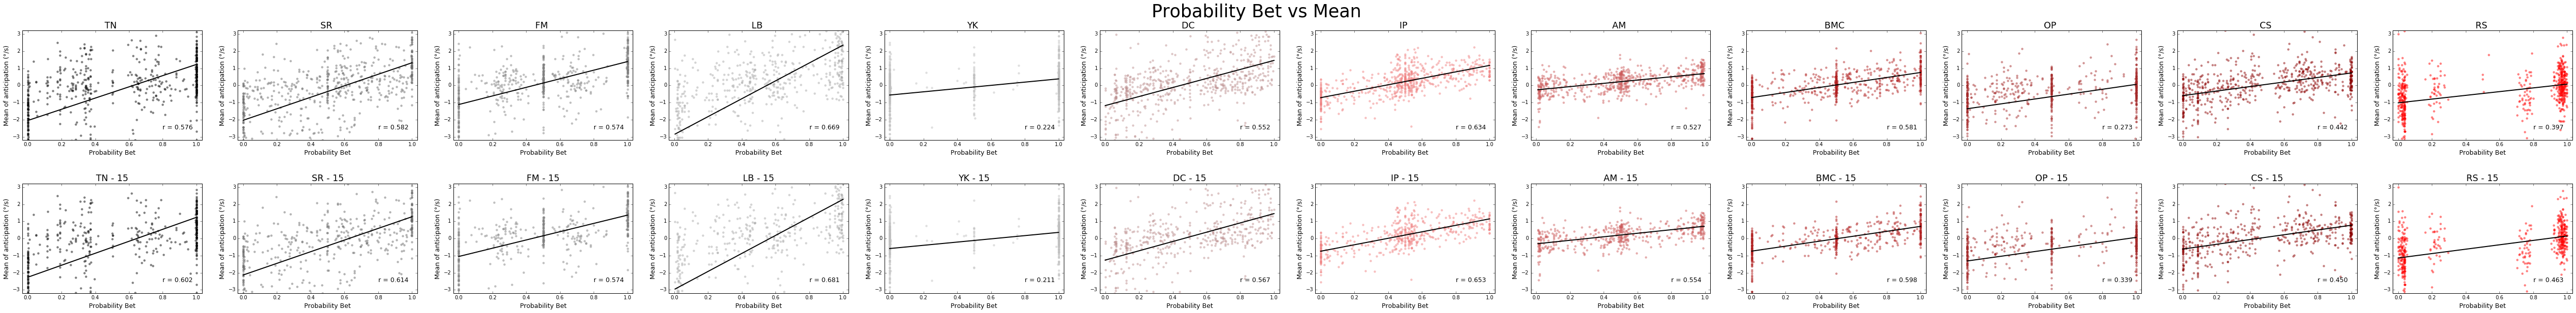

In [18]:
titre = "Probability Bet vs Mean"
y_1 = -3.192
y_2 = 3.192
proba = results_sujet
para = mean_sujet
x_label = 'Probability Bet'
y_label = 'Mean of anticipation (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)